In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [4]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [5]:
df = pd.read_csv('mlbootcamp5_train.csv')

In [6]:
print(df.shape)

(70000, 13)


In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


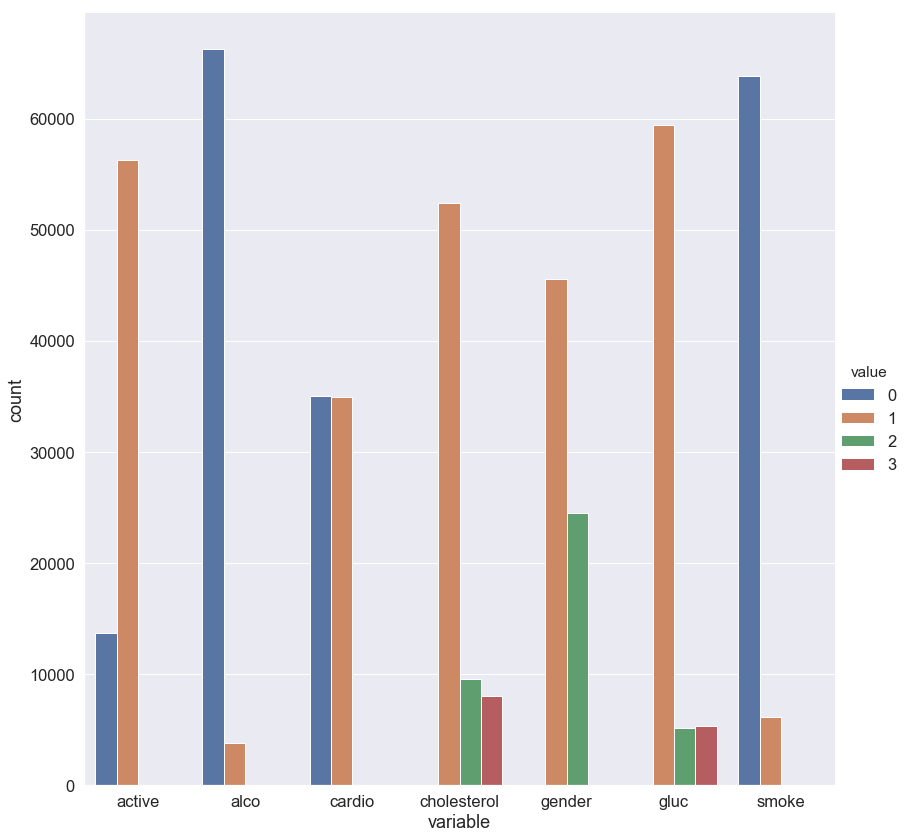

In [8]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

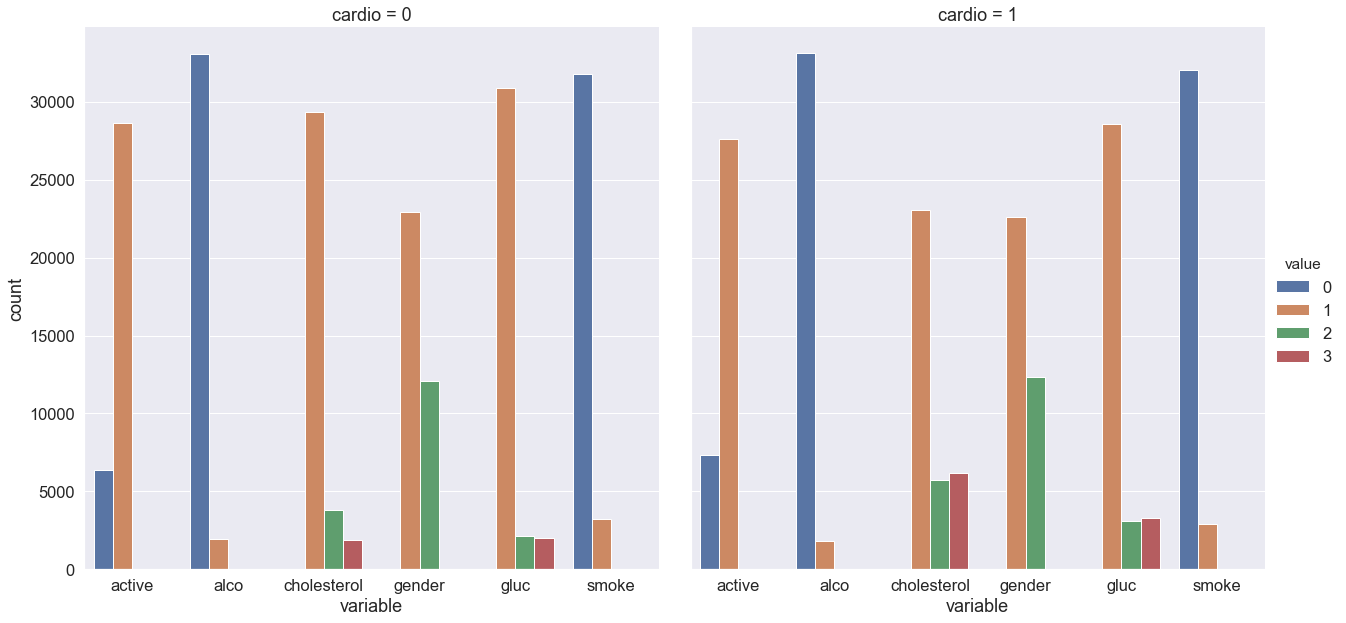

In [9]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

In [10]:
#Question 1.1. (1 point). How many men and women are present in this dataset?
#Values of the gender feature were not given (whether "1" stands for women or for men)
#figure this out by looking analyzing height, making the assumption that men are taller on average.

In [11]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
df[df['gender'] == 2]['height'].mean()

169.94789538210054

In [13]:
df[df['gender'] == 1]['height'].mean()

161.35561168460356

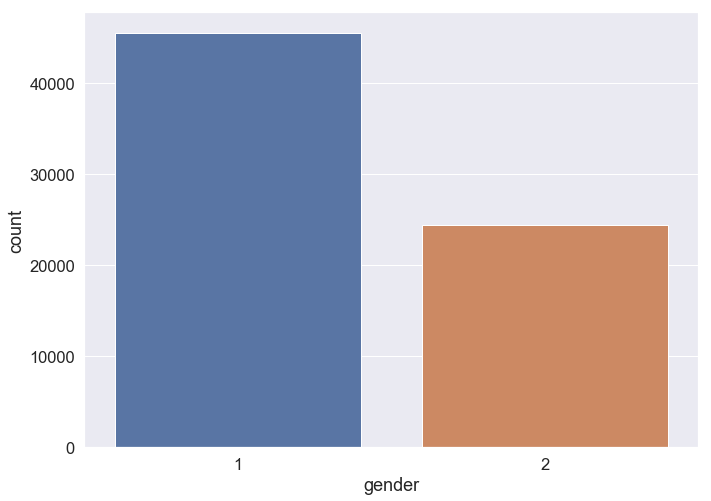

In [14]:
sns.countplot(x='gender' , data=df)

In [15]:
df[df['gender'] == 1].count()

id             45530
age            45530
gender         45530
height         45530
weight         45530
ap_hi          45530
ap_lo          45530
cholesterol    45530
gluc           45530
smoke          45530
alco           45530
active         45530
cardio         45530
dtype: int64

In [16]:
df[df['gender'] == 2].count()

id             24470
age            24470
gender         24470
height         24470
weight         24470
ap_hi          24470
ap_lo          24470
cholesterol    24470
gluc           24470
smoke          24470
alco           24470
active         24470
cardio         24470
dtype: int64

In [17]:
#Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

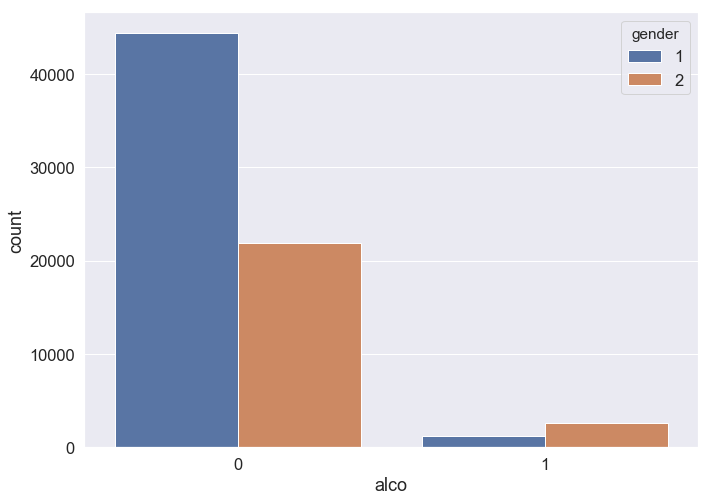

In [18]:
sns.countplot(x='alco' , hue = 'gender' , data =df)

In [19]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [20]:
#Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

In [21]:
df[(df['gender']==1)&(df['smoke']==1)].shape

(813, 13)

In [22]:
df[(df['gender']==2)&(df['smoke']==1)].shape

(5356, 13)

In [23]:
813/45530 - 5356/24470

-0.20102390309976736

In [24]:
#Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)?
#You'll need to figure out the units of feature age in this dataset.

In [25]:
df[(df['smoke'] == 1)]['age'].median()/30

637.5

In [26]:
df[(df['smoke'] == 0)]['age'].median()/30

657.4

In [27]:
# Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above.
# What is the ratio of these two fractions?

In [28]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')

In [29]:
df['age_years'].max()

65

In [30]:
smoking_old = df[(df['gender']==2) & (df['age_years'] >= 60) & (df['age_years'] <= 65) & (df['smoke']==1)]

In [31]:
smoking_old2 = df[(df['gender']==2) & (df['age_years'] >= 55) & (df['age_years'] < 60) & (df['smoke']==1)]

In [32]:
smoking_old[(smoking_old['cholesterol'] == 1) & (smoking_old['ap_hi'] < 120)]['cardio'].mean()

0.2597402597402597

In [33]:
smoking_old2[(smoking_old2['cholesterol'] == 1) & (smoking_old2['ap_hi'] < 120)]['cardio'].mean()

0.19047619047619047

In [34]:
#Question 1.6. (2 points). Choose the correct statements:.

#Median BMI in the sample is within boundaries of normal values.
#Women's BMI is on average higher then men's.
#Healthy people have, on average, higher BMI than ill people.
#In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women

In [35]:
df['BMI'] = df['weight']/(df['height']/100)**2

In [36]:
df.groupby('gender')['BMI'].mean()

gender
1    27.987583
2    26.754442
Name: BMI, dtype: float64

In [37]:
df.groupby('cardio')['BMI'].mean()

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [38]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

In [39]:
#Question 1.7. (2 points). How many percents of data (rounded) did we throw away?

In [40]:
filtered_df = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
print(filtered_df.shape[0] / df.shape[0])

0.9037


In [41]:
#Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

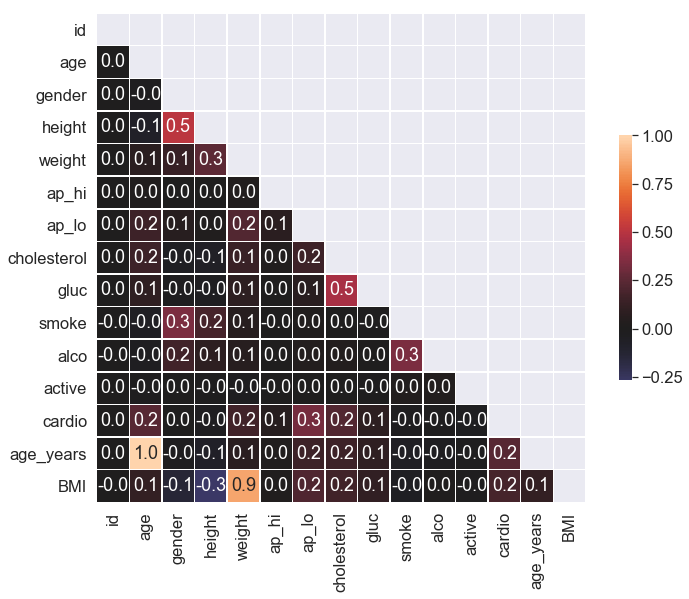

In [42]:
#Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method='pearson')

#Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [43]:
#Task:
#Create a violin plot for the height and gender using violinplot(). Use the parameters:
#hue to split by gender;
#scale to evaluate the number of records for each gender.
#In order for the plot to render correctly, you need to convert your 
#DataFrame to long format using the melt() function from pandas. Here is an example of this for your reference.

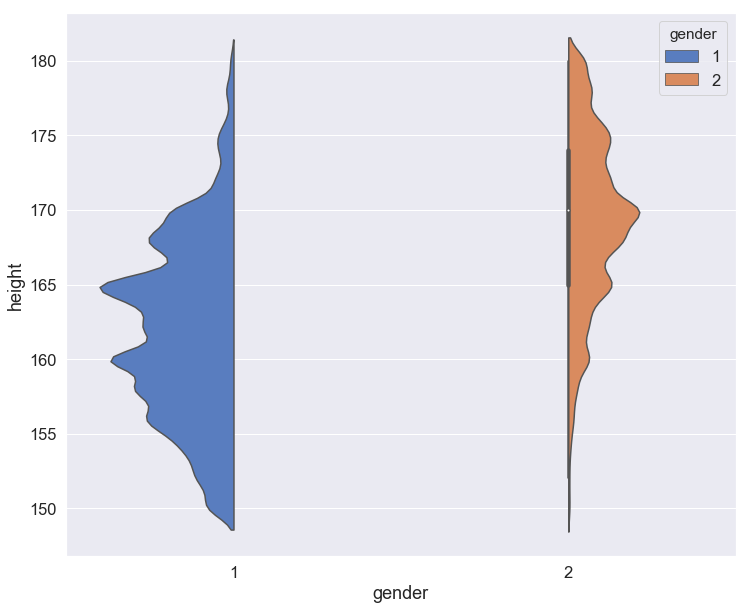

In [44]:
plt.figure(figsize=(12, 10))
sns.violinplot(x='gender', 
    y='height', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df, 
    scale='count',
    scale_hue=False)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


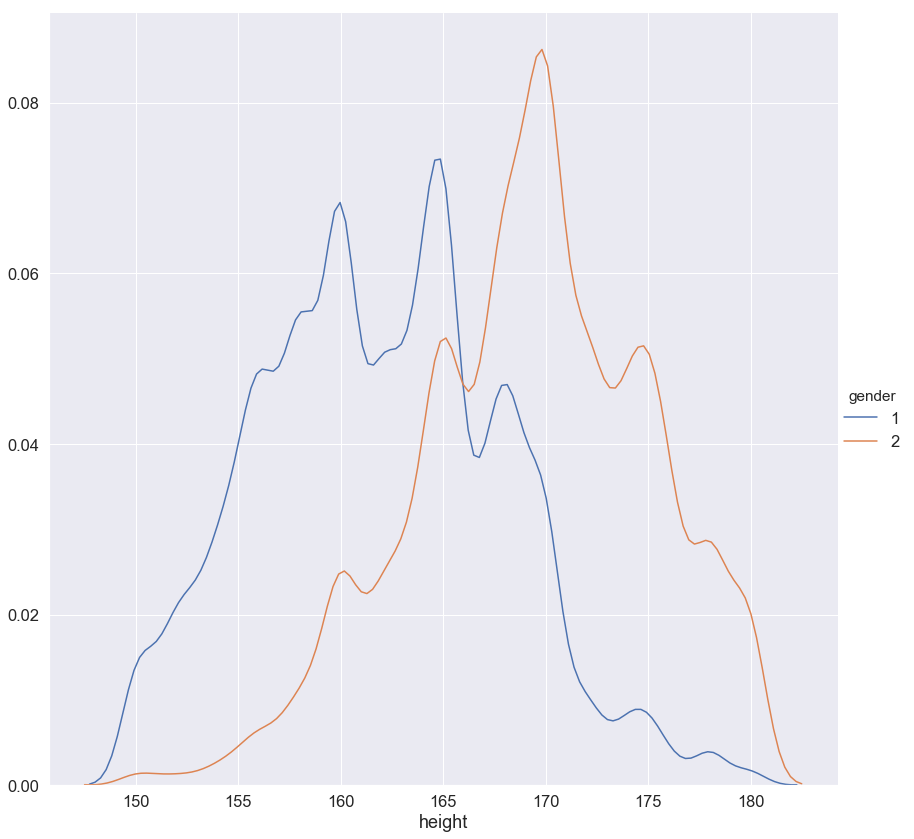

In [45]:
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();

In [46]:
#Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

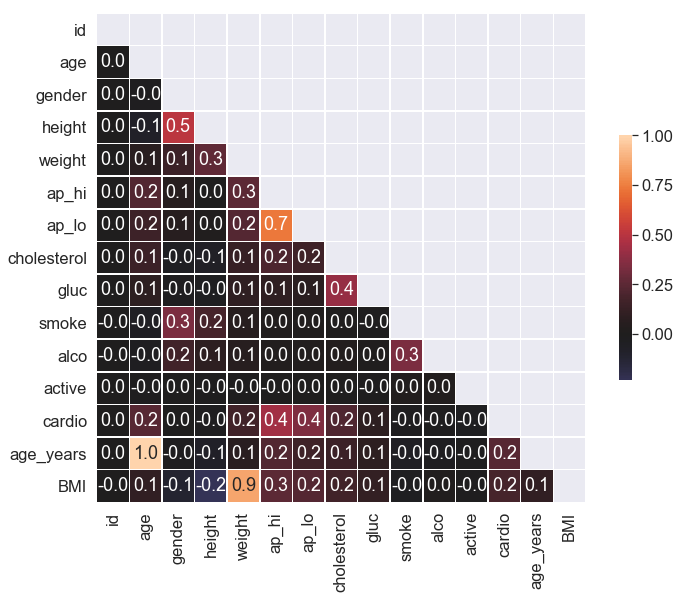

In [47]:
#Calculate the correlation matrix
df = filtered_df.copy()

corr = df.corr(method='spearman')

#Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [48]:
#Height, Weight - 0.3
#Age, Weight - 0.1
#Cholesterol, Gluc - 0.5
#Cardio, Cholesterol - 0.2
#Ap_hi, Ap_lo - 0.7
#Smoke, Alco - 0.3
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'BMI'],
      dtype='object')

In [ ]:
#Question 2.4. (1 point). What is the smallest age at which the number of people
#with CVD outnumber the number of people without CVD?

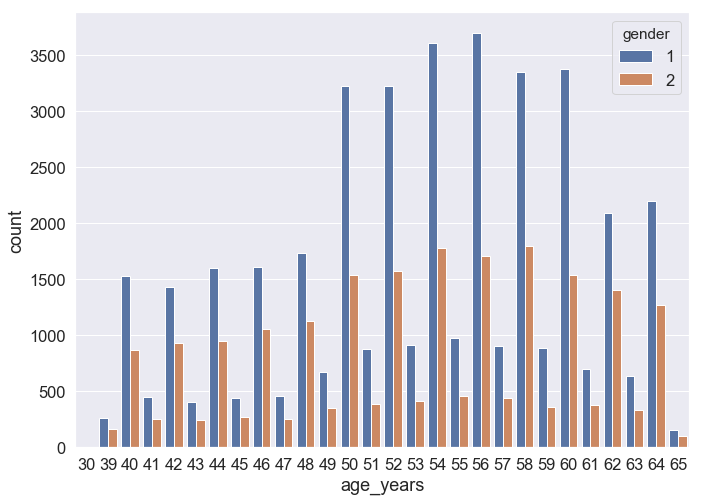

In [49]:
sns.countplot(data = df , x = 'age_years' , hue = 'gender')